In [1]:
import netCDF4 as nc
import numpy as np
import pylab as plt
import xarray as xr

# in UTC
start_time = 3
# in hours
sim_duration = 6

maindir = '/projects/awaken/j3lee/run_amrw/stable/'
stat_dir = '/post_processing'

lidar_dir = '/projects/awaken/j3lee/arm-data/sgpdlprofwstats4newsC1/'
lidar_file = 'sgpdlprofwstats4newsC1.c1.20180612.000000.custom.nc'

forcing_5m_nc = '/forcing_20180612_raj.nc'
# forcing_10m_nc = '/forcing_20180612_v10m-1km-3z-6h.nc'

sim_dict = {'s1_20180612-5m-p': '5-m_ppm-nolim', 
            's2_20180612-5m-w': '5-m_weno-z',  
            's3_20180612-10m-p': '10-m_ppm-nolim',
            's4_20180612-10m-w': '10-m_weno-z'}

# the forcing file used for the simulation 
forcing = nc.Dataset(maindir+'s1_20180612-5m-p'+forcing_5m_nc)
# print(forcing.variables.keys())

forcing_height = forcing['heights'][:]
forcing_time = forcing['times'][:]
n_fh = len(forcing_height)
n_ft = len(forcing_time)

forcing_momu = np.reshape(forcing['wrf_momentum_u'][:], (n_ft, n_fh))
forcing_momv = np.reshape(forcing['wrf_momentum_v'][:], (n_ft, n_fh))
forcing_temp = np.reshape(forcing['wrf_temperature'][:], (n_ft, n_fh))

In [2]:
def load_sim_data(maindir, run_dir, stat_dir, tags, tag, h_sim, t_sim, x_prof_list):

    xtime = xr.open_mfdataset(maindir+run_dir+stat_dir+'/abl_statistics*.nc', 
                              concat_dim=['num_time_steps'], combine='nested')
    xprof = xr.open_mfdataset(maindir+run_dir+stat_dir+'/abl_statistics*.nc', group='mean_profiles', 
                              concat_dim=['num_time_steps'], combine='nested')

    tags.append(tag)
    h_sim[tag] = xprof.variables['h'].values[0,:]
    t_sim[tag] = xtime.variables['time'].values
    xprof_list.append(xprof)
    
    return tags, h_sim, t_sim, xprof_list

tags = []
h_sim = {}
t_sim = {}
xprof_list = []

for key, val in sim_dict.items(): 

    tags, h_sim, t_sim, xprof_list = load_sim_data(maindir, key, stat_dir, tags, val, h_sim, t_sim, xprof_list)

In [6]:
def plot_profiles(xprof_list, tags, h_sim, t_sim, plot_var, plot_txt):

    fig, ax = plt.subplots(figsize=(8,8), ncols=3, nrows=2, sharey=True, sharex=True)

    for i, xprof in enumerate(xprof_list):

        tag = tags[i]
        hrwidth = int(3600./(t_sim[tag][1]-t_sim[tag][0]))
    #     print(tag)
    #     print(hrwidth)

        ax[0, 0].plot(np.mean(xprof[plot_var].values[0*hrwidth:1*hrwidth, :], axis=0), h_sim[tag][:], label=tag)

        ax[0, 1].plot(np.mean(xprof[plot_var].values[1*hrwidth:2*hrwidth, :], axis=0), h_sim[tag][:], label=tag)
        ax[0, 2].plot(np.mean(xprof[plot_var].values[2*hrwidth:3*hrwidth, :], axis=0), h_sim[tag][:], label=tag)
        ax[1, 0].plot(np.mean(xprof[plot_var].values[3*hrwidth:4*hrwidth, :], axis=0), h_sim[tag][:], label=tag)

        ax[1, 1].plot(np.mean(xprof[plot_var].values[4*hrwidth:5*hrwidth, :], axis=0), h_sim[tag][:], label=tag)
        ax[1, 2].plot(np.mean(xprof[plot_var].values[5*hrwidth:6*hrwidth, :], axis=0), h_sim[tag][:], label=tag)    

    # ax[0,0].set_ylim(0,2500)
    # ax[0,0].set_xlim(301,312)
    for i in np.arange(3):
        ax[1,i].set_xlabel(plot_txt)
    #     ax[1,i].set_xticks(np.arange(302,314,2))
    for j in np.arange(2):
        ax[j,0].set_ylabel('Height [m]')

    for i,current_ax in enumerate(ax.flatten()):
        current_ax.grid(True)
        current_ax.set_title(str(start_time+i)+'-'+str(start_time+i+1)+' UTC')
        
    plt.suptitle(plot_txt)

    plt.legend()

    plt.show()

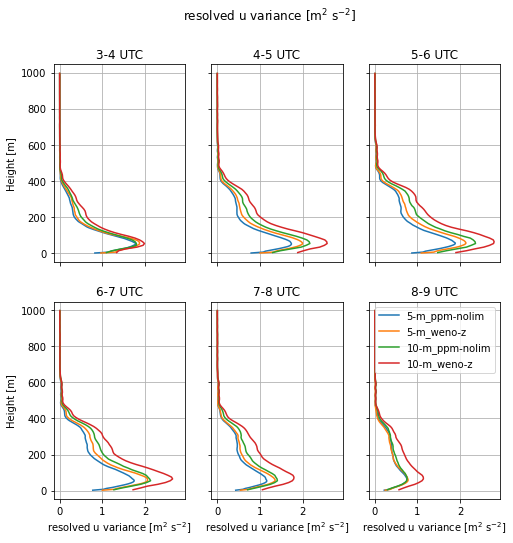

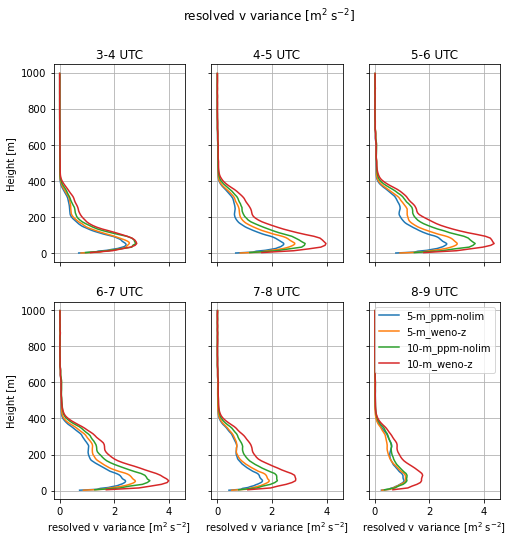

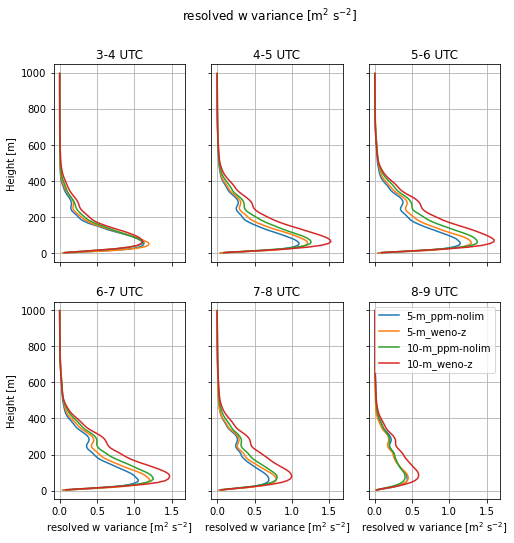

In [7]:
plot_dict = {'u\'u\'_r': r'resolved u variance [m$^2$ s$^{-2}$]', 
             'v\'v\'_r': r'resolved v variance [m$^2$ s$^{-2}$]', 
             'w\'w\'_r': r'resolved w variance [m$^2$ s$^{-2}$]'}

for key, val in plot_dict.items():

    plot_profiles(xprof_list, tags, h_sim, t_sim, key, val)